# Model Training 3 - Support Vector Machine     


##### Step 1 : Import Cleaned data

In [1]:
import pandas as pd
df_movies=pd.read_csv('rt_cleaned.csv')
df_movies.head()

,movie_title,directors,production_company,critic_name,review_content,review_type,cleaned_reviews,POS_tagged,Lemma,Subjectivity,Polarity,textblob_analysis
0,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,20th Century Fox,Andrew L. Urban,A fantasy adventure that fuses Greek mythology...,Positive,A fantasy adventure that fuses Greek mythology...,"[('fantasy', 'a'), ('adventure', 'n'), ('fuses...",fantasy adventure fuse Greek mythology conte...,0.041667,0.041667,Positive
1,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,20th Century Fox,Louise Keller,"Uma Thurman as Medusa, the gorgon with a coiff...",Positive,Uma Thurman as Medusa the gorgon with a coiffu...,"[('Uma', 'n'), ('Thurman', 'n'), ('Medusa', 'n...",Uma Thurman Medusa gorgon coiffure writhe sn...,1.000000,0.700000,Positive
2,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,20th Century Fox,NaN,With a top-notch cast and dazzling special eff...,Positive,With a top notch cast and dazzling special eff...,"[('top', 'a'), ('notch', 'n'), ('cast', 'n'), ...",top notch cast dazzle special effect tide te...,0.267857,0.214286,Positive
3,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,20th Century Fox,Ben McEachen,Whether audiences will get behind The Lightnin...,Positive,Whether audiences will get behind The Lightnin...,"[('Whether', 'n'), ('audiences', 'n'), ('get',...",Whether audience get behind Lightning Thief ...,0.470887,0.049242,Positive
4,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,20th Century Fox,Bill Goodykoontz,"Percy Jackson isn't a great movie, but it's a ...",Positive,Percy Jackson isn t a great movie but it s a g...,"[('Percy', 'n'), ('Jackson', 'n'), ('great', '...",Percy Jackson great movie good one trot kern...,0.462500,0.500000,Positive


##### Step 2: 
#####              a) Cleaned review and textblob_analysis column is selected 
#####              b) Colum textblob)analysis is renamed to sentiment         

In [2]:
df=pd.concat([df_movies.cleaned_reviews,df_movies.textblob_analysis],axis=1)
df.dropna(axis=0,inplace=True)
df.head()

,cleaned_reviews,textblob_analysis
0,A fantasy adventure that fuses Greek mythology...,Positive
1,Uma Thurman as Medusa the gorgon with a coiffu...,Positive
2,With a top notch cast and dazzling special eff...,Positive
3,Whether audiences will get behind The Lightnin...,Positive
4,Percy Jackson isn t a great movie but it s a g...,Positive


In [3]:
df=df.rename(columns={'textblob_analysis':'sentiment'})
df.head()

,cleaned_reviews,sentiment
0,A fantasy adventure that fuses Greek mythology...,Positive
1,Uma Thurman as Medusa the gorgon with a coiffu...,Positive
2,With a top notch cast and dazzling special eff...,Positive
3,Whether audiences will get behind The Lightnin...,Positive
4,Percy Jackson isn t a great movie but it s a g...,Positive


In [4]:
df.sentiment.unique().tolist()

['Positive', 'Negative', 'Neutral']

In [5]:
y,labels=pd.factorize(df.sentiment)

##### Step3:
##### a) The number of data is obtained for each section
##### b) Bar chart is plotted

In [6]:
df.sentiment.value_counts()

Positive    419893
Negative    239733
Neutral      76297
Name: sentiment, dtype: int64

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


D:\Telegram Desktop\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'sentiment')

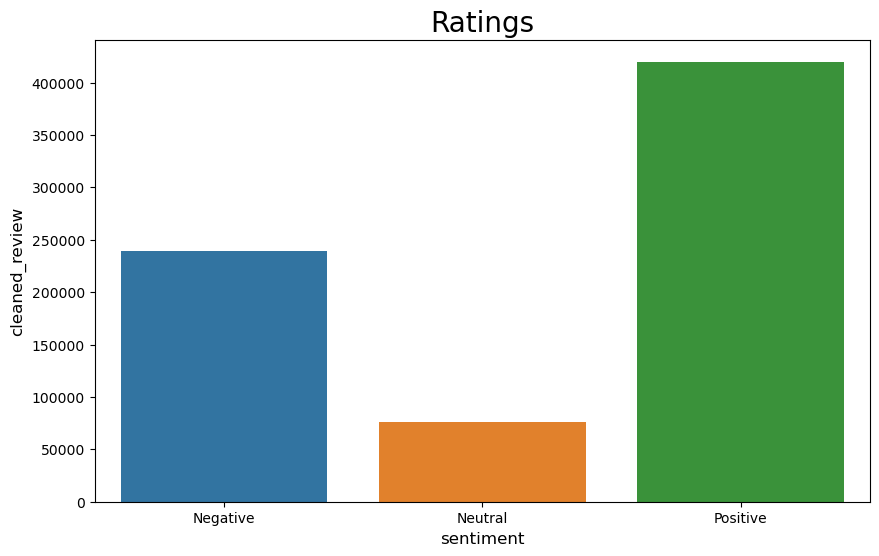

In [8]:
count=df['sentiment'].value_counts()
count=count.sort_index()
fig = plt.figure(figsize=(10,6))
ax=sns.barplot(count.index,count.values)
plt.title("Ratings",fontsize=20)
plt.ylabel("cleaned_review",fontsize=12)
plt.xlabel('sentiment',fontsize=12)



##### Step 4:
##### The sentiment is tranform from string to number :-
##### Positive=0, Negative=1, Neutral = 2

In [9]:
df_sentiment=df[df.sentiment!=3]
pd.set_option('mode.chained_assignment',None)
df_sentiment["labels"]=df_sentiment["sentiment"].apply=[0 if i=="Positive" else 1 if i=="Negative" else 2 for i in df.sentiment]
df_sentiment=df_sentiment.drop("sentiment",axis=1)
df_sentiment.head()

,cleaned_reviews,labels
0,A fantasy adventure that fuses Greek mythology...,0
1,Uma Thurman as Medusa the gorgon with a coiffu...,0
2,With a top notch cast and dazzling special eff...,0
3,Whether audiences will get behind The Lightnin...,0
4,Percy Jackson isn t a great movie but it s a g...,0


D:\Telegram Desktop\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'sentiment')

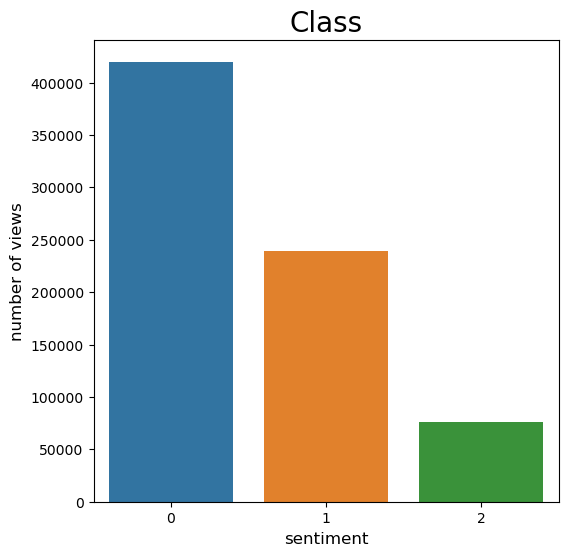

In [10]:
count_label=df_sentiment['labels'].value_counts()
count_label=count_label.sort_index()
fig = plt.figure(figsize=(6,6))
ax=sns.barplot(count_label.index,count_label.values)
plt.title("Class",fontsize=20)
plt.ylabel("number of views",fontsize=12)
plt.xlabel('sentiment',fontsize=12)

##### Step 5:  Splitting test and train data

In [11]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import make_scorer,accuracy_score,f1_score
from sklearn.datasets import make_blobs
df_sentiment=df_sentiment.sample(n=100000,replace=True) #SVM cannot compute large datasets
#df_sentiment.sample(n=100000,replace=True)
train,test=train_test_split(df_sentiment,test_size=0.3,random_state=1 )
X_train=train['cleaned_reviews'].values
X_test=test['cleaned_reviews'].values
y_train=train['labels']
y_test=test['labels']


##### Step6: Tokenization 

In [12]:
import nltk
nltk.download('stopwords')
import tokenize 
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def tokenize(text):
    token=TweetTokenizer()
    return token.tokenize(text)

def stem(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

stopwords_eng=set(stopwords.words("english"))

vectorizer=CountVectorizer(analyzer='word',tokenizer=tokenize,lowercase=True,ngram_range=(1,1),stop_words=stopwords_eng)

In [14]:
kfolds=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
tfidfvectorizer=TfidfVectorizer()

In [15]:
df_sentiment.shape

(100000, 2)

In [16]:
texts=df_sentiment.cleaned_reviews.tolist()

print(type(texts))
print(texts[0])

<class 'list'>
A slender honest study of a boy learning to be a man his own way 


In [17]:
print(len(texts))

100000


##### Step7: Training by Vectorizing using TF-IDF and the Classifer using SVM 

In [18]:
X= tfidfvectorizer.fit_transform(df_sentiment['cleaned_reviews'].values.astype('U'))

In [19]:
X.shape


(100000, 51055)

In [20]:
#print(X)

In [21]:
y.shape

(735923,)

In [22]:
print(y)

[0 0 0 ... 2 0 0]


In [23]:
svm=SVC(kernel='linear',C=1,gamma=0.001)
X_train,X_test,y_train,y_test=train_test_split(X,df_sentiment['labels'])
svm.fit(X_train,y_train)


SVC(C=1, gamma=0.001, kernel='linear')

In [24]:
print("Score of test: "+ str(svm.score(X_test,y_test)))


Score of test: 0.88368


In [25]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=1,gamma=0.001) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


##### Step 8: Accuracy and classification report is obtained 

In [26]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))


Accuracy: 0.88368
Precision: 0.8819236471532284
Recall: 0.88368


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     14220
           1       0.89      0.86      0.87      8190
           2       0.82      0.64      0.71      2590

    accuracy                           0.88     25000
   macro avg       0.86      0.81      0.83     25000
weighted avg       0.88      0.88      0.88     25000



In [28]:
print(confusion_matrix(y_test, y_pred))

[[13387   644   189]
 [  948  7059   183]
 [  691   253  1646]]


##### Step 9: Visualization using confusion matrix

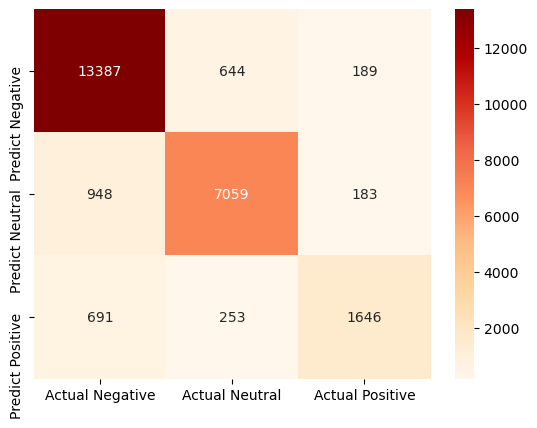

In [29]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd')
plt.show()

In [ ]:
from sklearn.svm import SVR
regressor=SVR(kernel='linear')
X_train,X_test,y_train,y_test=train_test_split(X,df_sentiment['labels'])
regressor.fit(X_train,y_train)
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Score of test: "+ str(regressor.score(X_test,y_test)))